# Clase 9 Setiembre - Azure Data Scientist
## Preparación de datos 1
## Dataset Utilizado: Hotel Booking
https://www.kaggle.com/datasets/mojtaba142/hotel-booking/data

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential
from sklearn.feature_selection import VarianceThreshold

# CREDENCIALES AZURE
ml_client = MLClient.from_config(credential=DefaultAzureCredential())
# METADATA ASSET
data_asset = ml_client.data.get("booking-dsrp", version="1")


class DataProcessor:

    def __init__(self, data: pd.DataFrame):
        self.data = data

    def process_numeric(self):

       num_data = self.data.select_dtypes(include="numeric")

       selector = VarianceThreshold(threshold=0.1)
       selector.fit(num_data)
       return num_data

Found the config file in: /config.json


In [7]:
reservas_hotel_raw = pd.read_csv(data_asset.path)
reservas_hotel_raw.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734


In [7]:
reservas_hotel_raw.shape

(119390, 36)

In [8]:
reservas_hotel_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Exploración Inicial

In [10]:
reservas_hotel_raw.describe(include='object').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


In [11]:
reservas_hotel_raw.describe(include='int').T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.0,0.0,0.0,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.0,18.0,69.0,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.0,16.0,28.0,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.0,0.0,1.0,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.0,1.0,2.0,3.0,50.0
adults,119390.0,1.856403,0.579261,0.0,2.0,2.0,2.0,55.0
babies,119390.0,0.007949,0.097436,0.0,0.0,0.0,0.0,10.0
is_repeated_guest,119390.0,0.031912,0.175767,0.0,0.0,0.0,0.0,1.0


In [13]:
reservas_hotel_raw.describe(include='float').T

,count,mean,std,min,25%,50%,75%,max
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
agent,103050.0,86.693382,110.774548,1.00,9.00,14.000,229.0,535.0
company,6797.0,189.266735,131.655015,6.00,62.00,179.000,270.0,543.0
adr,119390.0,101.831122,50.535790,-6.38,69.29,94.575,126.0,5400.0


## EDA: Exploratory data analysis

<Axes: >

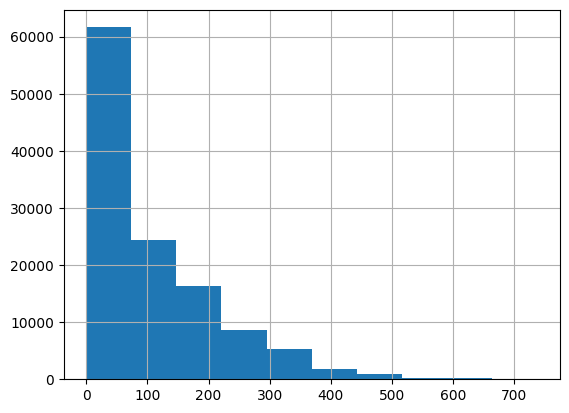

In [9]:
reservas_hotel_raw['lead_time'].hist()